# Machine Problem  1 - Path Planning
 **Cruz, Rianna**   
 **Leal, Lois Anne**

## Problem Description: 
Consider the problem of finding the shortest path between two points on a plane that has polygonal obstacles. This is an idealization of the problem a robot has to solve to navigate it way around a crowded environment.

## Solution Proper:

We provide the solution such that we first discuss how we set up the state space--from our input files to the graph dictionary that we will be using in our search algorithms. We then discuss each algorithms using our first test cases. We compress our code for each major steps into functions to provide readability, since we will be using them in other test cases. So at the end of the discussion of each algorithm, we run the five test cases--the first one included--so as to show and provided understanding to each test case.

At the end, after we have discussed all the algorithms and run each five test cases for each algorithm, we analyze and compare each algorithm. The five test cases are actually created with the mind to benefit the analysis and comparison of the algorithms--showing their strengths and weaknesses in the selected criteria.

### 1. Setting Up the State Space 

  #### A. As Grid

In setting up the state space, our main function is the createStateSpaceGrid which outputs the startNode, goalNode and the grid we will be using in our next step. The format of the call function is as shown below:

            startNode, goalNode, grid = createStateSpaceGrid(fileName,imgName)

The idea of createStateSpace is further divided into three major group of steps. The first one is to read the .txt file using the *read_input* function. To express the obstacles into an accessible 100 x 200 grid, we defined two functions such as *plot_polygon* and *plot_point* so as to first plot them and save the result as a .png image. We want the image to be in grayscale so as to refer to 0s as points not in the polygon obstacle(s) and to refer to 1s as points in the polygon obstacle(s). Lastly, out of the image, we create the accessible grid. 

*Note:* Together with the functions stated above, we also used some python libraries such as matplotlib, numpy and cv2.

In [7]:
import re

def read_input(filename):
    file = open (filename, 'r+', encoding='utf-8')
    point = r'([\d]+,[\d]+)'

    start = tuple(map(int, re.search(point, file.readline())[0].split(',')))
    goal  = tuple(map(int, re.search(point, file.readline())[0].split(',')))

    shapes = []
    for line in file:
        shape = []
        for point_i in re.findall(point, line):
            point_int = map(int, point_i.split(','))
            shape.append(list(point_int))
        shapes.append(shape)

    file.close()
    return start, goal, shapes

In [21]:
import matplotlib.pyplot as plt

def plot_polygon(coord):
    coord.append(coord[0]) # repeat the first point to create a 'closed loop'
    ys, xs = zip(*coord)   # create lists of x and y values
    plt.plot(ys,xs, linewidth=10) 

def plot_point(pt):
    plt.scatter(pt[1], pt[0], 20)

In [55]:
import matplotlib.pyplot as plt
import numpy as np
import cv2

def createStateSpaceGrid(fileName, imgName):
    # read .txt file
    startNode, goalNode, shapes = read_input(fileName) 

    # plot the figure
    plt.figure() 
    plt.xlim(0, 200)
    plt.ylim(0, 100)
    plt.gca().invert_yaxis()

    for shape in shapes:
        plot_polygon(shape) 

    # plot starting and goal points
    plot_point(startNode) 
    plot_point(goalNode)

    # save the figure as .png image file
    plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False,
                        labelright=False, labelbottom=False)
    # plt.savefig('maze.png', bbox_inches='tight', transparent=True, pad_inches=0)
    plt.savefig(imgName, bbox_inches='tight', transparent=True, pad_inches=0)
    plt.clf() 
    
    # read the image file and resize to original scale
    img = cv2.imread(imgName, cv2.IMREAD_GRAYSCALE)
    light = cv2.resize(img, (200, 100))
    
    # ensure borderless processing
    plt.axis('off')
    plt.tick_params(axis='both', left=False, top=False, right=False, bottom=False, labelleft=False, labeltop=False,
                            labelright=False, labelbottom=False)
    plt.tight_layout(pad=0)
    
    # convert to grayscale for later for
    # 0s to mean not a point in the polygon obstacle
    # 1s to mean a point in the polygon obstacle
    imgplot = plt.imshow(img, cmap='Greys_r')

    plt.show()

    # initialize the grid
    grid = np.zeros((100, 200))

    # express the sides of the polygon obstacle(s) as 1s 
    # in the grid
    for row, row_points in enumerate(light):
        for col, col_val in enumerate(row_points):
            if col_val < 255:
                grid[row][col] = 1

    grid = grid.tolist()
    
    return startNode, goalNode, grid, shapes

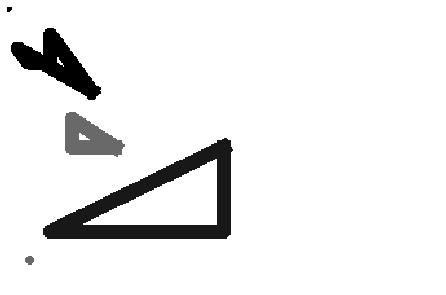

In [58]:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in1.txt','maze1.png')

  #### B. Converting the Grid Representation to a Graph Dictionary

After getting the accessible grid, we convert it further to a graph dictionary. The rationale behind choosing graph dictionary is that, we can manipulate them easier and they also simulate the behavior of trees per se. 

Our main function here is:

                               graph = createGraph(grid) 

The graph dictionary has the following structure:

                  (parent tuple): [(child1 tuple), (child2 tuple), ...]
                         
Intuitively, explaining the structure, we use tuples to represent the nodes of our graph such that for each cell in the grid, we see them as nodes in the graph. Furthermore, the format above explains that for each node in the grid and *not in a polygon obstacle*, we consider as a parent node and its children, *also not in a polygon obstacle*, as the possible moves which are left, right, top and bottom. 

In [59]:
from collections import defaultdict 

def addEdge(graph,u,v): 
    graph[u].append(v)


def createGraph(grid):
    #get the size of the grid
    rows = len(grid) 
    cols = len(grid[0])

    graph = defaultdict(list) 
    
    for row in range(rows):
        for col in range(cols):
            # move only when there's a space to move in the direction
            # and the considered point is not a point in the obstacle
        
            if col != 0 and grid[row][col]!=1 and grid[row][col-1]!=1:
                addEdge(graph,(row,col),(row,col-1)) #left
                
            if col < cols-1 and grid[row][col]!=1 and grid[row][col+1]!=1:
                addEdge(graph,(row,col),(row,col+1)) #right
                
            if row != 0 and grid[row][col]!=1 and grid[row-1][col]!=1:
                addEdge(graph,(row,col),(row-1,col)) #top
                
            if row < rows-1 and grid[row][col]!=1 and grid[row+1][col]!=1:
                addEdge(graph,(row,col),(row+1,col)) #bottom
    
    return graph

In [27]:
graph = createGraph(grid) 

In [ ]:
# uncomment to print the graph dictionary 
# for k,v in graph.items():
#    print(k,':',v)

### 2. Search Algorithms

Now that our state space is set, we proceed to our Search Algorithms which will be explained in the following order: Breadth-First Search(BFS), Depth-First Search(DFS) and A* Search. 

For each search algorithm, we give the state again the problem definition. We then show the data structures that will be used and tell its process. Also, in some of the algorithms we included remarks such as word of cautions and some notes. 

Each algorithm is implemented as a function such that each has a calling function of the format:

                           <name>Algo(graph, startNode, goalNode)
                           
where <name> can be 'bfs','dfs', or 'Astar'. This function prints the starting point, goal point, solution path, cost of solution, number of expanded nodes, and actual running time of the program. Note, however, that in BFS and DFS, each step is 1. Thus, the cost of the solution path is the length of the solution path. 

After the function(s) related to the main algorithm were processed, we visualize what happened by plotting again the state space, but now together with the solution path. We do this to all five test cases.

   #### A. Breadth-First Search(BFS) Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the Breadth First Search Algorithm. 


**Data Structures:**

We use two data structures:
   
   (1) *parent* is a dictionary to know the parent of the given node.
   
   (2) *fringe* is a queue.


**We proceed to the process:**

1.we append the starting node to the fringe

2.we explore while the fringe still has nodes
   
3.so we pop the first element of the fringe
   
4.put this to the expanded node
*Note:* we enable duplicates with the nodes such that an explored node may still be considered
  
5.We check if the node that is expanded is the goal. We stop if it is and if not, we continue
   
6.Since it's not the goal node, we look to its children
that is if the node is not in the fringe, we append it
to the fringe. 


**Caution! The Nature of Starting and Goal Point**

However, we need to consider the nature of starting and goal point in telling who's the parent and who's the child for backtracking purposes later to get the solution path if we reached the goal. 
     
So if the start point is found above or in the same row as the goal point, we will only assign the parent-child relationship such that only those who are in the higher rows or
in the same row can parent but not those who are below them can parent the ones above. 

On the other hand, if the start point is found below or in the same row as the goal point,
we will only assign the parent-child relationship such that only those who are in the lower rows or in the same row can parent but not those who are above them can parent the ones below. 

***Why?***

Since we are considering graphs, it is possible to have cycles. If we do not include those conditions, there will come a time that the above node can parent the below and the below can parent the above, thus if we backtrack say (3,0) is the parent of (4,0), then it would ask, who is the parent of (3,0) then we will find that it is (4,0) and it will just loop forever--which we do not want to happen.

We implement this solution in the code below:

In [ ]:
import time

def backtrace(parent, start, end):
    path = [end]
    while path[-1] != start:
        add = parent[path[-1]]
        path.append(add)
    path.reverse()
    return path
      
def bfs(expandedNode, graph, start, goal):
    parent = {} 
    fringe = [] 
    fringe.append(start) #append starting node
    
    while fringe: #explore til the fringe is not empty!
        node = fringe.pop(0) #get vertex
        expandedNode.append(node) #append the considered vertex to the Expanded Nodes
        if node == goal: #if reaches goal node
            return backtrace(parent, start, goal),expandedNode
        for adjacent in graph.get(node, []): #consider the children of the popped node 
            if node not in fringe:     
                if start[0]<=goal[0]:
                  if adjacent[0] >= node[0]:
                    parent[adjacent] = node  
                if start[0]>=goal[0]:
                    if adjacent[0] <= node[0]:
                      parent[adjacent] = node  
                fringe.append(adjacent) 

def bfsAlgo(graph, startNode, goalNode):
    expandedNode = []
    start = time.time()
    print("starting point:", startNode)
    print("goal point:", goalNode)
    path, expandedNode=bfs(expandedNode,graph, startNode, goalNode)
    print("solution Path:",path)
    print("cost of the solution:", len(path))
    print("number of expanded nodes:",len(expandedNode))
    end = time.time()
    print("actual running time of the program:", end - start)
    return path

In [ ]:
bfsSolPath = bfsAlgo(graph, startNode, goalNode)

**Visualize Results**

We use the function *finalPlot* to plot our state space together with the solution path.

From sir carlo: Describe and show the diagram/picture of the input files that you have created and the solution path generated

As to summarize the test case with the test case No. 1 above we have,

In [ ]:
def finalPlot(solPath, startNode, goalNode, shapes, imgName):
    # plot the figure
    plt.figure() 
    plt.gca().invert_yaxis()
    
    #plot obstacles    
    for shape in shapes:
        plot_polygon(shape)

    #plot the solution path
    for point in solPath:
        plot_point(point)
        
    # plot starting and goal points
    plot_point(startNode) 
    plot_point(goalNode)
    plot_point((100, 200))

    plt.savefig(imgName)
    plt.show()

In [ ]:
#Test Case No. 1:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in1.txt','maze1.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestOne.png')


In [ ]:
#Test Case No. 2:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in2.txt','maze2.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestTwo.png')
print(grid[20][20])

In [ ]:
#Test Case No. 3:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in3.txt','maze3.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestThree.png')

In [ ]:
#Test Case No. 4:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in4.txt','maze4.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestFour.png')

In [ ]:
#Test Case No. 5:
startNode, goalNode, grid, shapes  = createStateSpaceGrid('in5.txt','maze5.png')
graph = createGraph(grid)  #create the graph dictionary
bfsSolPath = bfsAlgo(graph, startNode, goalNode)
finalPlot(bfsSolPath, startNode, goalNode, shapes, 'bfsTestFive.png')

   #### B. Depth-First Search(DFS) Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the Depth-First Search Algorithm. 


**Data Structures**

We use two data structures:
   
   (1) *path* is a dictionary to know the parent of the given node.
   
   (2) *visited* is a queue.

   (3) *fringe* is a priority queue. 


**We proceed to the process:**

1.we put the starting node in the fringe with priority 0

2.we explore while the fringe still has nodes
   
3.so we pop the first element of the fringe which has the highest priority
   
4.put this to the expanded node
  
5.We check if the node that is expanded is the goal. We stop if it is and if not, we continue

6.Since it's not the goal node, we look to its children
that is if the node is not in the fringe, we append it
to the fringe. 

7.Since in working with dfs, the fringe does the trick, we assign the priority depending on the depth of the node. We put the negative sign so that we consider them first as this is dfs. 
This also let us not use anymore the parent dictionary. 


We implement this solution in the code below:

In [ ]:
from queue import PriorityQueue
from collections import defaultdict 
import time

def dfs(expandedNode, graph, startNode, goalNode):
    path = [startNode]
    visited = []
    fringe = PriorityQueue()
    fringe.put((0, startNode, path, visited))

    while fringe:
        depth, currentNode, path, visited = fringe.get()
        
        expandedNode.append(currentNode)

        if currentNode == goalNode: 
            return (path + [currentNode]),expandedNode
          
        if currentNode not in visited:
          visited = visited + [currentNode]

        for node in graph[currentNode]: #look at the children
            if node not in visited:
                if node == goalNode:
                    expandedNode.append(node)
                    return (path + [node]),expandedNode               
                fringe.put((-len(path), node, path + [node], visited + [node]))
    return path 

def dfsAlgo(graph, startNode, goalNode):
    start = time.time()
    expandedNode = []
    print("starting point:", startNode)
    print("goal point:", goalNode)
    path, expandedNode= dfs(expandedNode, graph, startNode, goalNode)
    print("solution path:", path) 
    print("cost of the solution:", len(path))
    print("number of expanded nodes:",len(expandedNode))
    end = time.time()
    print("actual running time of the program:", end - start)
    
    return path

In [ ]:
dfsSolPath = dfsAlgo(graph, startNode, goalNode)

**Visualize Results**

We use the function *finalPlot* to plot our state space together with the solution path.

From sir carlo: Describe and show the diagram/picture of the input files that you have created and the solution path generated

In [ ]:
#Test Case No. 1:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in1.txt','maze1.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestOne.png')


In [ ]:
#Test Case No. 2:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in2.txt','maze2.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestTwo.png')

In [ ]:
#Test Case No. 3:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in3.txt','maze3.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestThree.png')

In [ ]:
#Test Case No. 4:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in4.txt','maze4.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestFour.png')

In [ ]:
#Test Case No.5:
startNode, goalNode, grid, shapes = createStateSpaceGrid('in5.txt','maze5.png')
graph = createGraph(grid)  #create the graph dictionary
dfsSolPath = dfsAlgo(graph, startNode, goalNode)
finalPlot(dfsSolPath, startNode, goalNode, shapes, 'dfsTestFive.png')

   #### C. A* Search Implementation  

**Problem Definition:**

Given the starting and goal point, we are tasked to know the shortest solution path between those two points using the A* Search Algorithm. 


**Heuristic Function**


**Data Structures**
We use two data structures:
   
   (1) 
   
   (2) 

   (3) 
   
**We proceed to the process:**

1.

2.
   
3.
   
4.
  
5.

6.

7.


We implement this solution in the code below:

In [ ]:
insert functions here for A*

In [ ]:
AstarAlgo(graph, startNode, goalNode)

**Seeing the solution path visually we have**

note to Lois and Ri! insert below the plot of solution path and the state space

From sir carlo: Describe and show the diagram/picture of the input files that you have created and the solution path generated

In [ ]:
#just edit this to show the path in the grid 
gridResultAstar = grid #Be sure to do this! We still want to reuse the statespace in the next algos
for (i,j) in path:
    gridResultAstar[i][j]= '*'
print(grid) #change this to plot!!!

## Analysis: 

Note to Lois and Ri from sir carlo!

An analysis and comparison of the different search methods based on relevant criteria, along with appropriate conclusions

#### Breadth-First Search Implementation



##### References:

https://codereview.stackexchange.com/questions/135156/bfs-implementation-in-python-3 

https://dbader.org/blog/priority-queues-in-python

https://medium.com/@lennyboyatzis/ai-teaching-pacman-to-search-with-depth-first-search-ee57daf889ab